# Ejercicio 1: Estimacion ecuación lineal con dos parámetros
$y=\omega_1 · X_1 + \omega_2 · X_2 + cte.$

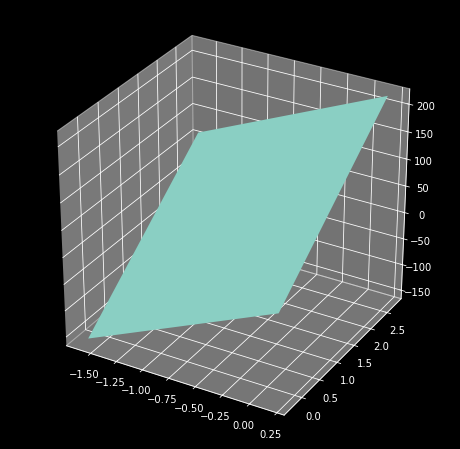

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter


cte = 2
x,y, coef= datasets.make_regression(random_state=42,n_features=2,coef=True,bias=cte)
omega = coef[0]
omega2 = coef[1]


#Imprimimos

fig = plt.figure()
ax = fig.add_subplots(projection='3d')

#Para el 3D hace falta un grid
X, Y = np.meshgrid(x[0],x[1])
Z = X*omega + Y*omega2 + cte

# Plot the surface.
ax.plot_surface(X, Y, Z)


plt.show()

In [19]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

 
# Creamos la red neuronal
model = Sequential()

# Añadimos la Neurona, que está en una capa densa, con dos entradas (cada uno de
# los parámetros y la constane. La activación lineal devuelve el rango de reales
model.add(Dense(1, input_shape=(2,), use_bias=True, activation='linear'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [20]:


#La red ha inicializado los parámetros
weights = model.layers[0].get_weights()
print(weights)

xw_init = weights[0][0][0]
xw2_init = weights[0][1][0]

b_init = weights[1][0]


print("""\nModelo de regresion lineal inicializado con:
w1: %.2f w2: %.2f b: %.2f 
(Objetivo w1: %.2f  w2: %.2f b: %.2f)
""" % (xw_init, xw2_init, b_init, omega,omega2, cte))


model.compile(optimizer='sgd', loss='mean_squared_error')

print(x.shape)
print(x[:5,:])
model.fit(x,y, batch_size=1, epochs=30)


weights = model.layers[0].get_weights()
xw_fin = weights[0][0][0]
xw2_fin = weights[0][1][0]

b_fin = weights[1][0]


print("""\nModelo de regresion lineal Final con:
w1: %.2f w2: %.2f b: %.2f 
(Objetivo w1: %.2f  w2: %.2f b: %.2f)
""" % (xw_fin, xw2_fin, b_fin,omega,omega2, cte))

[array([[0.827705  ],
       [0.65260184]], dtype=float32), array([0.], dtype=float32)]

Modelo de regresion lineal inicializado con:
w1: 0.83 w2: 0.65 b: 0.00 
(Objetivo w1: 87.74  w2: 74.08 b: 2.00)

(100, 2)
[[-1.60748323  0.18463386]
 [-0.26465683  2.72016917]
 [ 1.46564877 -0.2257763 ]
 [ 1.86577451  0.47383292]
 [-1.0708925   0.48247242]]
Epoch 1/30
100/100 [==============================] - 0s 2ms/step - loss: 3254.3591
Epoch 2/30
100/100 [==============================] - 0s 2ms/step - loss: 106.8837
Epoch 3/30
100/100 [==============================] - 0s 2ms/step - loss: 4.8722
Epoch 4/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2604
Epoch 5/30
100/100 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 6/30
100/100 [==============================] - 0s 2ms/step - loss: 8.1398e-04
Epoch 7/30
100/100 [==============================] - 0s 2ms/step - loss: 4.5937e-05
Epoch 8/30
100/100 [==============================] - 0s 2ms/step - loss:

In [21]:

#Para el 3D hace falta un grid
Z_hat = X*xw_fin + Y*xw2_fin + b_fin

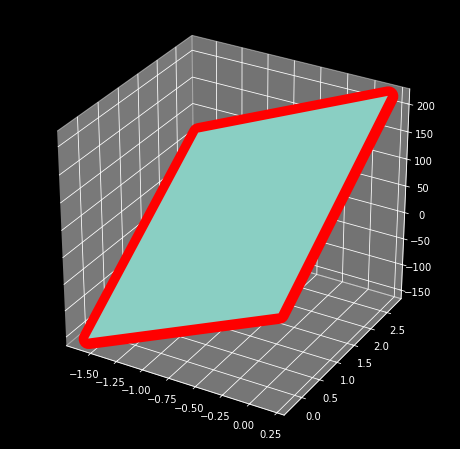

In [22]:

fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, Z_hat,alpha=0,linewidth=20, edgecolors='r')

plt.show()

# Ejercicio 2: MNIST con densas

In [23]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical 
import numpy as np
import matplotlib.pyplot as plt 

idx=1
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')
np.set_printoptions(linewidth=200)
print(X_train[idx,:])

print("Train forma:", X_train.shape)
print("Test forma:", X_test.shape)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  48. 238.
 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54. 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.
   0.   0.   0.   0.

In [24]:
# Ayudamos normalizando los datos
X_train /= 255
X_test /= 255

In [25]:
n_classes = 10
print("Forma antes del one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Forma después del one-hot encoding: ", Y_train.shape)

print(y_train[idx])
print(Y_train[idx])

print("\n")
print(y_train[idx+1])
print(Y_train[idx+1])

Forma antes del one-hot encoding:  (60000,)
Forma después del one-hot encoding:  (60000, 10)
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

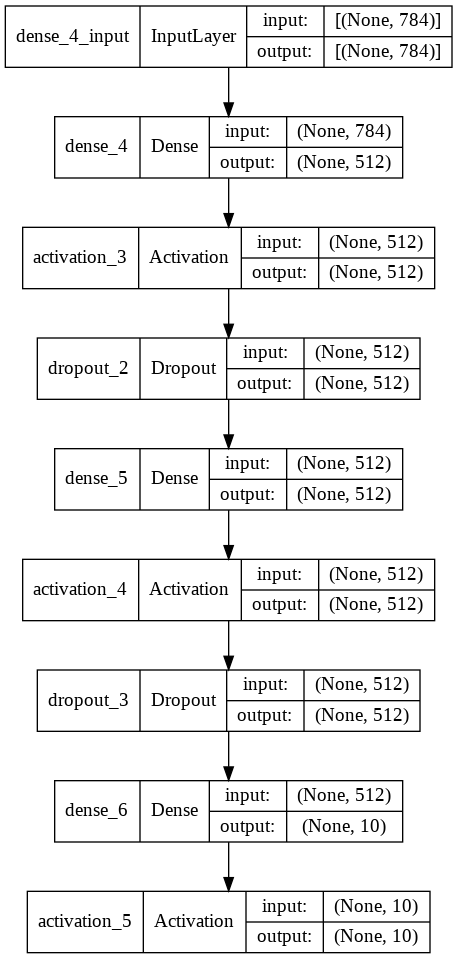

In [27]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='mnist_lin.png')
from IPython.display import Image
Image(retina=True, filename='mnist_lin.png')

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')


In [29]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 3s - loss: 0.2507 - categorical_accuracy: 0.9251 - val_loss: 0.1047 - val_categorical_accuracy: 0.9668 - 3s/epoch - 6ms/step
Epoch 2/20
469/469 - 2s - loss: 0.1016 - categorical_accuracy: 0.9686 - val_loss: 0.0889 - val_categorical_accuracy: 0.9726 - 2s/epoch - 4ms/step
Epoch 3/20
469/469 - 2s - loss: 0.0713 - categorical_accuracy: 0.9778 - val_loss: 0.0694 - val_categorical_accuracy: 0.9776 - 2s/epoch - 4ms/step
Epoch 4/20
469/469 - 2s - loss: 0.0571 - categorical_accuracy: 0.9816 - val_loss: 0.0684 - val_categorical_accuracy: 0.9783 - 2s/epoch - 4ms/step
Epoch 5/20
469/469 - 2s - loss: 0.0489 - categorical_accuracy: 0.9840 - val_loss: 0.0646 - val_categorical_accuracy: 0.9803 - 2s/epoch - 4ms/step
Epoch 6/20
469/469 - 2s - loss: 0.0394 - categorical_accuracy: 0.9871 - val_loss: 0.0693 - val_categorical_accuracy: 0.9786 - 2s/epoch - 4ms/step
Epoch 7/20
469/469 - 2s - loss: 0.0323 - categorical_accuracy: 0.9891 - val_loss: 0.0648 - val_categorical_accuracy: 0.9809 

## Guardar un modelo
Para no tener que estimar cada vez el modelo, éste se puede guardar en un fichero para ser recuperado después

In [30]:
model_name = 'keras_mnist.h5'
model.save(model_name)
print(f"Modelo guardado en {model_name}")

Modelo guardado en keras_mnist.h5


## Cargar un modelo
Para recuperar de un archivo

In [31]:
from tensorflow.keras.models import load_model
mnist_model = load_model("keras_mnist.h5")
print(mnist_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

## Evaluación
Probamos el modelo con los datos de test

In [32]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0725 - categorical_accuracy: 0.9829 - 853ms/epoch - 3ms/step
Test Loss 0.07249969244003296
Test Accuracy 0.9829000234603882


In [33]:
#Una prediccion:
predicted_values = mnist_model.predict(X_test)
print(predicted_values[0])

predicted_classes = np.argmax(mnist_model.predict(X_test), axis=-1)
print(predicted_classes[0])

# Deprecated
#predicted_probs = mnist_model.predict_proba(X_test)
#print(predicted_probs[0])
# Deprecated
#predicted_classes = mnist_model.predict_classes(X_test)
#print(predicted_classes[0])

[8.6943072e-13 9.2175274e-11 3.9035142e-10 9.0050989e-08 1.4338773e-13 1.1529922e-14 2.0826570e-17 9.9999917e-01 3.1069278e-10 6.8439823e-07]
7


In [34]:
def pintar_9_numeros(predicted_classes, X_test, y_test,use_indices,cmap):
  # Reducimos el tamaño para que quepan los subplots
  plt.rcParams['figure.figsize'] = (8,8)
  plt.style.use('dark_background')

  figure_evaluation = plt.figure()

  # pintar 9 graficos
  for i, use in enumerate(use_indices[:9]):
      plt.subplot(3,3,i+1)
      plt.imshow(X_test[use].reshape(28,28), cmap=cmap, interpolation='none')
      plt.title(
        "Predicción: {}, Verdad: {}".format(predicted_classes[use],
                                          y_test[use]))
      plt.xticks([])
      plt.yticks([])
      
  figure_evaluation
  
  
def pintar_predicciones(mnist_model,X_test,y_test): 
  predicted_classes = np.argmax(mnist_model.predict(X_test), axis=-1)
  #predicted_classes = mnist_model.predict_classes(X_test)
  correct_indices = np.nonzero(predicted_classes == y_test)[0]
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
  print()
  print(len(correct_indices)," bien clasificados")
  print(len(incorrect_indices)," mal clasificados")
  
  pintar_9_numeros(predicted_classes, X_test, y_test,correct_indices,'Greens')
  pintar_9_numeros(predicted_classes, X_test, y_test,incorrect_indices,'Oranges')
  



9829  bien clasificados
171  mal clasificados


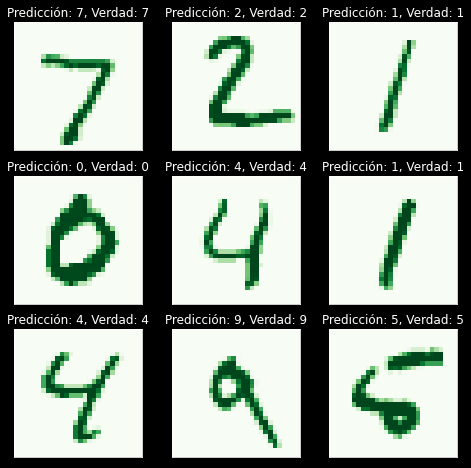

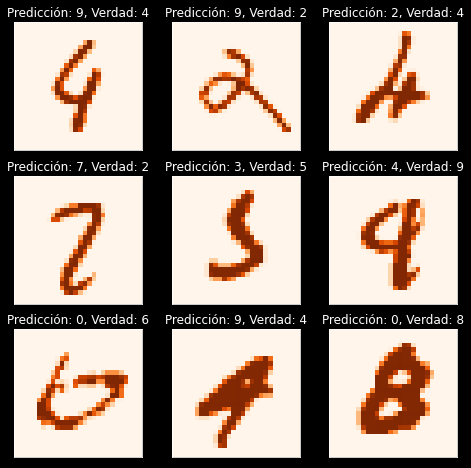

In [35]:
pintar_predicciones(mnist_model,X_test,y_test) 